In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_excel(r'C:\Users\Rashi Parashar\OneDrive\Desktop\used_car_price_dataset_extended.csv.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [4]:
df.head(10)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,NaN,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


In [5]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

<Axes: >

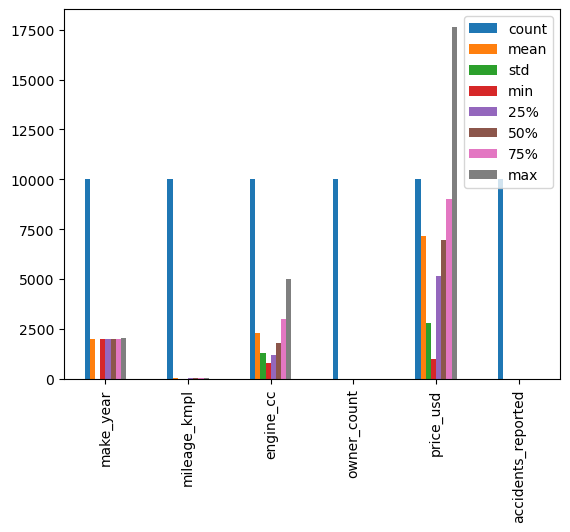

In [6]:
df.describe().T.plot(kind='bar')

In [7]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

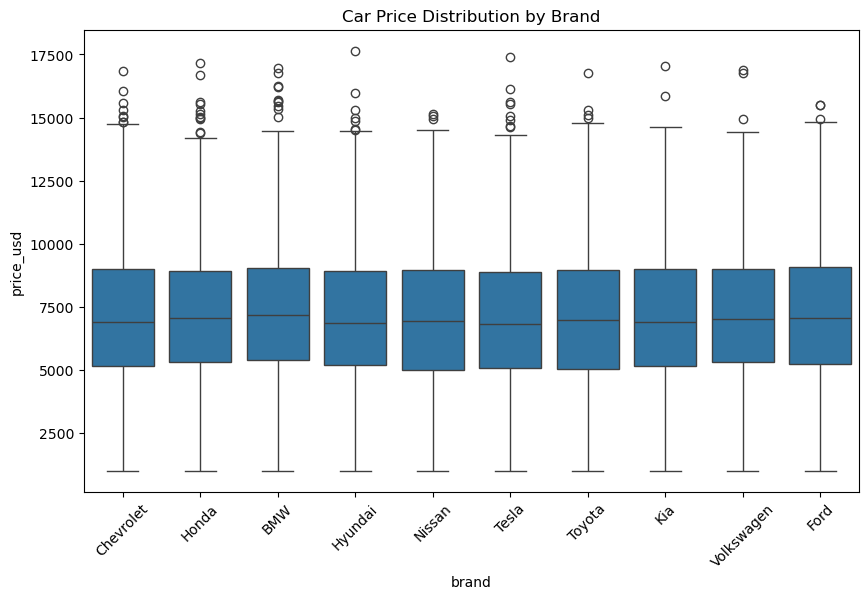

In [8]:
# Visualize: Impact of Brand on Price
plt.figure(figsize=(10,6))
sns.boxplot(x='brand',y='price_usd',data=df)
plt.xticks(rotation=45)
plt.xlabel('brand')
plt.ylabel('price_usd')
plt.title('Car Price Distribution by Brand')
plt.show()

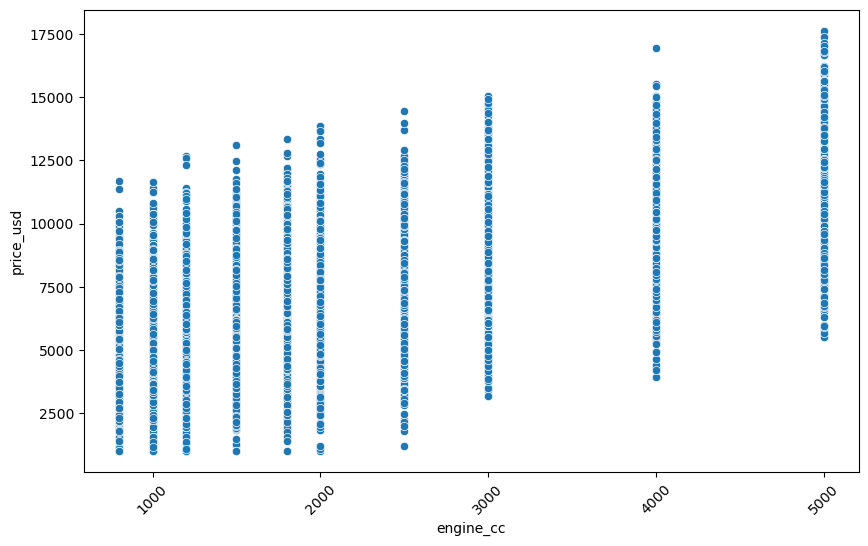

In [9]:
# Visualize: Impact of Engine Size on Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='engine_cc',y='price_usd',data=df)
plt.xticks(rotation=45)
plt.xlabel('engine_cc')
plt.ylabel('price_usd')
plt.show()

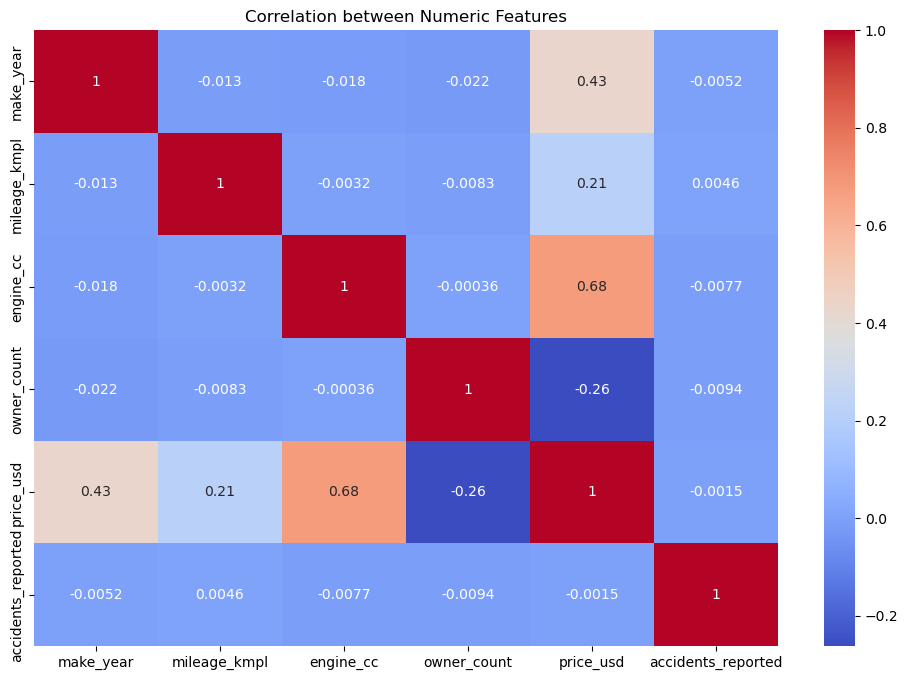

In [10]:
# correlation heatmap
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


In [11]:
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [12]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10000, 12) (8000, 11) (2000, 11) (8000,) (2000,)


In [57]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['make_year', 'mileage_kmpl',
                                                   'engine_cc', 'owner_count',
                                                   'accidents_reported']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel_type', 'brand',
                                                   'transmission', 'color',
                                                   'service_history',
                                                   'insurance_valid'])])),
                ('regressor', LinearRegression())])

In [58]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 982154.6863680375
R-squared: 0.8765442855949437


In [28]:
# Step 1: Get column names from training data
print(X.columns.tolist())


['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count', 'brand', 'transmission', 'color', 'service_history', 'accidents_reported', 'insurance_valid']


In [60]:
new_data = pd.DataFrame({
    'mileage_kmpl': ['17.59'],
    'engine_cc': ['800'],
    'brand': ['Hyundai'],
    'fuel_type': ['Petrol'],
    'transmission': ['Manual'],
    'service_history':['Full'],
    'accidents_reported':[1],
    'color':['Black'],
    'insurance_valid':['Yes'],
    'owner_count':[2],
    'make_year':[2005]
})

predicted_price = model.predict(new_data)
print('Predicted Price:', predicted_price)


Predicted Price: [4458.375]
